In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
pc_loss = """
Epoch: 0 / 100, Loss: 0.022779425380935702
  2%|▏         | 2/100 [02:09<1:45:24, 64.54s/it]
Epoch: 1 / 100, Loss: 0.0017324858133760275
  3%|▎         | 3/100 [03:14<1:44:37, 64.72s/it]
Epoch: 2 / 100, Loss: 0.0013210399451271991
  4%|▍         | 4/100 [04:18<1:43:26, 64.65s/it]
Epoch: 3 / 100, Loss: 0.0009827819135491292
  5%|▌         | 5/100 [05:23<1:42:15, 64.59s/it]
Epoch: 4 / 100, Loss: 0.0007937291014308241
  6%|▌         | 6/100 [06:27<1:41:08, 64.55s/it]
Epoch: 5 / 100, Loss: 0.00085707316584748
  7%|▋         | 7/100 [07:31<1:39:55, 64.47s/it]
Epoch: 6 / 100, Loss: 0.0005714081815681345
  8%|▊         | 8/100 [08:36<1:38:58, 64.55s/it]
Epoch: 7 / 100, Loss: 0.0005318676771139269
  9%|▉         | 9/100 [09:41<1:38:16, 64.80s/it]
Epoch: 8 / 100, Loss: 0.0004362258103008615
 10%|█         | 10/100 [10:47<1:37:22, 64.92s/it]
Epoch: 9 / 100, Loss: 0.00040564919343338656
 11%|█         | 11/100 [11:51<1:36:14, 64.89s/it]
Epoch: 10 / 100, Loss: 0.0003764715943290231
 12%|█▏        | 12/100 [12:56<1:35:07, 64.86s/it]
Epoch: 11 / 100, Loss: 0.0002842799373158828
 13%|█▎        | 13/100 [14:01<1:33:56, 64.78s/it]
Epoch: 12 / 100, Loss: 0.00030350539968187335
 14%|█▍        | 14/100 [15:06<1:32:51, 64.79s/it]
Epoch: 13 / 100, Loss: 0.00027414984380042597
 15%|█▌        | 15/100 [16:10<1:31:38, 64.69s/it]
Epoch: 14 / 100, Loss: 0.00025403662413320943
 16%|█▌        | 16/100 [17:15<1:30:33, 64.69s/it]
Epoch: 15 / 100, Loss: 0.00023635273389689739
 17%|█▋        | 17/100 [18:20<1:29:34, 64.75s/it]
Epoch: 16 / 100, Loss: 0.00022805365172263303
 19%|█▉        | 19/100 [20:29<1:27:19, 64.69s/it]
Epoch: 18 / 100, Loss: 0.0001819579726313454
 20%|██        | 20/100 [21:33<1:26:08, 64.60s/it]
Epoch: 19 / 100, Loss: 0.00019709931599086927
 21%|██        | 21/100 [22:38<1:24:59, 64.55s/it]
Epoch: 20 / 100, Loss: 0.00018120490121329466
 22%|██▏       | 22/100 [23:42<1:23:54, 64.55s/it]
Epoch: 21 / 100, Loss: 0.00018110915718766958
 23%|██▎       | 23/100 [24:47<1:22:46, 64.50s/it]
Epoch: 22 / 100, Loss: 0.00015935378042451754
 24%|██▍       | 24/100 [25:51<1:21:47, 64.58s/it]
Epoch: 23 / 100, Loss: 0.00019682838678403229
 25%|██▌       | 25/100 [26:56<1:20:46, 64.62s/it]
Epoch: 24 / 100, Loss: 0.00012943497139696349
 26%|██▌       | 26/100 [28:01<1:19:40, 64.60s/it]
Epoch: 25 / 100, Loss: 0.00015977913896389652
 27%|██▋       | 27/100 [29:06<1:18:41, 64.68s/it]
Epoch: 26 / 100, Loss: 0.000136082509508422
 28%|██▊       | 28/100 [30:10<1:17:40, 64.73s/it]
Epoch: 27 / 100, Loss: 0.00014644331647648015
 29%|██▉       | 29/100 [31:15<1:16:35, 64.73s/it]
Epoch: 28 / 100, Loss: 0.000134077385422469
 30%|███       | 30/100 [32:20<1:15:33, 64.77s/it]
Epoch: 29 / 100, Loss: 0.00013672453144158276
 31%|███       | 31/100 [33:25<1:14:35, 64.86s/it]
Epoch: 30 / 100, Loss: 0.00013063725915451435
 32%|███▏      | 32/100 [34:30<1:13:30, 64.86s/it]
Epoch: 31 / 100, Loss: 0.00013076626064092845
 33%|███▎      | 33/100 [35:35<1:12:29, 64.92s/it]
Epoch: 32 / 100, Loss: 0.00012963956997610185
 34%|███▍      | 34/100 [36:40<1:11:25, 64.94s/it]
Epoch: 33 / 100, Loss: 0.00010635405237616247
 35%|███▌      | 35/100 [37:45<1:10:20, 64.93s/it]
Epoch: 34 / 100, Loss: 0.00012114798876467514
 36%|███▌      | 36/100 [38:50<1:09:17, 64.97s/it]
Epoch: 35 / 100, Loss: 0.00011098524843443335
 37%|███▋      | 37/100 [39:55<1:08:10, 64.93s/it]
Epoch: 36 / 100, Loss: 0.00011065303197133676
 38%|███▊      | 38/100 [41:00<1:07:07, 64.97s/it]
Epoch: 37 / 100, Loss: 0.00010714368549983428
 39%|███▉      | 39/100 [42:05<1:06:06, 65.03s/it]
Epoch: 38 / 100, Loss: 0.0001041216784780671
 40%|████      | 40/100 [43:10<1:04:59, 64.99s/it]
Epoch: 39 / 100, Loss: 0.0001114510494532432
 41%|████      | 41/100 [44:15<1:03:56, 65.02s/it]
Epoch: 40 / 100, Loss: 9.623998880216799e-05
 42%|████▏     | 42/100 [45:20<1:02:51, 65.03s/it]
Epoch: 41 / 100, Loss: 0.00010451633714093408
 43%|████▎     | 43/100 [46:25<1:01:44, 64.99s/it]
Epoch: 42 / 100, Loss: 9.748940288040215e-05
 44%|████▍     | 44/100 [47:30<1:00:40, 65.01s/it]
Epoch: 43 / 100, Loss: 0.00010487418520941962
 45%|████▌     | 45/100 [48:35<59:34, 64.99s/it]  
Epoch: 44 / 100, Loss: 0.00010673623671031989
 46%|████▌     | 46/100 [49:40<58:26, 64.93s/it]
Epoch: 45 / 100, Loss: 9.152481449859686e-05
 47%|████▋     | 47/100 [50:45<57:21, 64.93s/it]
Epoch: 46 / 100, Loss: 8.781429348268834e-05
 48%|████▊     | 48/100 [51:50<56:15, 64.92s/it]
Epoch: 47 / 100, Loss: 9.985539928581181e-05
 49%|████▉     | 49/100 [52:54<55:08, 64.87s/it]
Epoch: 48 / 100, Loss: 9.547735028910131e-05
 50%|█████     | 50/100 [53:59<54:04, 64.90s/it]
Epoch: 49 / 100, Loss: 9.538892012831424e-05
 51%|█████     | 51/100 [55:04<52:57, 64.86s/it]
Epoch: 50 / 100, Loss: 8.746117718159113e-05
 52%|█████▏    | 52/100 [56:09<51:51, 64.82s/it]
Epoch: 51 / 100, Loss: 9.97387327518616e-05
 53%|█████▎    | 53/100 [57:14<50:47, 64.84s/it]
Epoch: 52 / 100, Loss: 8.544185735208674e-05
 54%|█████▍    | 54/100 [58:18<49:40, 64.80s/it]
Epoch: 53 / 100, Loss: 9.220869576316738e-05
 55%|█████▌    | 55/100 [59:23<48:37, 64.83s/it]
Epoch: 54 / 100, Loss: 8.339865658617572e-05
 56%|█████▌    | 56/100 [1:00:28<47:32, 64.84s/it]
Epoch: 55 / 100, Loss: 8.405484214379141e-05
 57%|█████▋    | 57/100 [1:01:33<46:26, 64.81s/it]
Epoch: 56 / 100, Loss: 8.231941282650824e-05
 58%|█████▊    | 58/100 [1:02:39<45:32, 65.07s/it]
Epoch: 57 / 100, Loss: 8.397020561662844e-05
 59%|█████▉    | 59/100 [1:03:43<44:26, 65.03s/it]
Epoch: 58 / 100, Loss: 9.109840645482126e-05
 60%|██████    | 60/100 [1:04:48<43:20, 65.01s/it]
Epoch: 59 / 100, Loss: 7.865136326439163e-05
 61%|██████    | 61/100 [1:05:53<42:14, 64.99s/it]
Epoch: 60 / 100, Loss: 8.56937563733807e-05
 62%|██████▏   | 62/100 [1:06:58<41:09, 64.99s/it]
Epoch: 61 / 100, Loss: 7.96706927519286e-05
 63%|██████▎   | 63/100 [1:08:03<40:00, 64.88s/it]
Epoch: 62 / 100, Loss: 8.28446561832246e-05
 64%|██████▍   | 64/100 [1:09:08<38:57, 64.93s/it]
Epoch: 63 / 100, Loss: 7.407486143412619e-05
 65%|██████▌   | 65/100 [1:10:13<37:52, 64.92s/it]
Epoch: 64 / 100, Loss: 8.221160595935653e-05
 66%|██████▌   | 66/100 [1:11:18<36:46, 64.89s/it]
Epoch: 65 / 100, Loss: 7.826776048282222e-05
 67%|██████▋   | 67/100 [1:12:23<35:44, 64.98s/it]
Epoch: 66 / 100, Loss: 7.579895954850555e-05
 68%|██████▊   | 68/100 [1:13:28<34:36, 64.90s/it]
Epoch: 67 / 100, Loss: 7.810705769894786e-05
 69%|██████▉   | 69/100 [1:14:33<33:34, 65.00s/it]
Epoch: 68 / 100, Loss: 7.444631392286546e-05
 70%|███████   | 70/100 [1:15:38<32:29, 64.98s/it]
Epoch: 69 / 100, Loss: 8.30679465006393e-05
 71%|███████   | 71/100 [1:16:43<31:24, 65.00s/it]
Epoch: 70 / 100, Loss: 7.554839445842076e-05
 72%|███████▏  | 72/100 [1:17:48<30:19, 64.98s/it]
Epoch: 71 / 100, Loss: 7.316116398119509e-05
 73%|███████▎  | 73/100 [1:18:53<29:15, 65.03s/it]
Epoch: 72 / 100, Loss: 7.337718071422326e-05
 74%|███████▍  | 74/100 [1:19:58<28:08, 64.92s/it]
Epoch: 73 / 100, Loss: 7.201646902486369e-05
 75%|███████▌  | 75/100 [1:21:03<27:04, 64.98s/it]
Epoch: 74 / 100, Loss: 7.574838544244221e-05
 76%|███████▌  | 76/100 [1:22:08<25:57, 64.91s/it]
Epoch: 75 / 100, Loss: 7.028836839465315e-05
 77%|███████▋  | 77/100 [1:23:13<24:54, 64.99s/it]
Epoch: 76 / 100, Loss: 7.122341815037127e-05
 78%|███████▊  | 78/100 [1:24:18<23:51, 65.08s/it]
Epoch: 77 / 100, Loss: 6.880250696663828e-05
 79%|███████▉  | 79/100 [1:25:23<22:44, 64.99s/it]
Epoch: 78 / 100, Loss: 7.005430287836469e-05
 80%|████████  | 80/100 [1:26:28<21:40, 65.04s/it]
Epoch: 79 / 100, Loss: 7.065118370567202e-05
 81%|████████  | 81/100 [1:27:33<20:35, 65.02s/it]
Epoch: 80 / 100, Loss: 6.846825545355562e-05
 82%|████████▏ | 82/100 [1:28:38<19:30, 65.04s/it]
Epoch: 81 / 100, Loss: 7.392815006956748e-05
 83%|████████▎ | 83/100 [1:29:43<18:25, 65.02s/it]
Epoch: 82 / 100, Loss: 6.601962527030766e-05
 84%|████████▍ | 84/100 [1:30:48<17:21, 65.10s/it]
Epoch: 83 / 100, Loss: 6.775879982450145e-05
 85%|████████▌ | 85/100 [1:31:53<16:15, 65.04s/it]
Epoch: 84 / 100, Loss: 6.701134292195263e-05
 86%|████████▌ | 86/100 [1:32:58<15:11, 65.11s/it]
Epoch: 85 / 100, Loss: 7.210412032583396e-05
 87%|████████▋ | 87/100 [1:34:03<14:05, 65.07s/it]
Epoch: 86 / 100, Loss: 6.380336085509418e-05
 88%|████████▊ | 88/100 [1:35:09<13:01, 65.10s/it]
Epoch: 87 / 100, Loss: 6.698305224656373e-05
 89%|████████▉ | 89/100 [1:36:14<11:56, 65.12s/it]
Epoch: 88 / 100, Loss: 6.693061847315897e-05
 90%|█████████ | 90/100 [1:37:19<10:51, 65.14s/it]
Epoch: 89 / 100, Loss: 6.417604012454193e-05
 91%|█████████ | 91/100 [1:38:24<09:47, 65.25s/it]
Epoch: 90 / 100, Loss: 6.0965325407128526e-05
 92%|█████████▏| 92/100 [1:39:30<08:41, 65.25s/it]
Epoch: 91 / 100, Loss: 8.527285267934034e-05
 93%|█████████▎| 93/100 [1:40:35<07:36, 65.20s/it]
Epoch: 92 / 100, Loss: 6.868196993483231e-05
 94%|█████████▍| 94/100 [1:41:40<06:30, 65.13s/it]
Epoch: 93 / 100, Loss: 6.0900361399243366e-05
 95%|█████████▌| 95/100 [1:42:45<05:26, 65.24s/it]
Epoch: 94 / 100, Loss: 7.027867683867522e-05
 96%|█████████▌| 96/100 [1:43:50<04:20, 65.16s/it]
Epoch: 95 / 100, Loss: 5.9881971296860885e-05
 97%|█████████▋| 97/100 [1:44:56<03:15, 65.22s/it]
Epoch: 96 / 100, Loss: 7.115574730588165e-05
 98%|█████████▊| 98/100 [1:46:01<02:10, 65.21s/it]
Epoch: 97 / 100, Loss: 5.449657297672938e-05
 99%|█████████▉| 99/100 [1:47:06<01:05, 65.21s/it]
Epoch: 98 / 100, Loss: 6.199247414915131e-05
100%|██████████| 100/100 [1:48:11<00:00, 64.92s/it]
Epoch: 99 / 100, Loss: 6.160663260414354e-05
"""

In [11]:
def parse_losses(log_string: str) -> list[float]:
    pattern = re.compile(r"Loss: (\d+\.\d+)")
    loss_strings = pattern.findall(log_string)
    losses = [float(loss_str) for loss_str in loss_strings]

    return losses

In [12]:
loss = parse_losses(pc_loss)

In [13]:
loss = [x * 10**-5 for x in loss if x > 1]

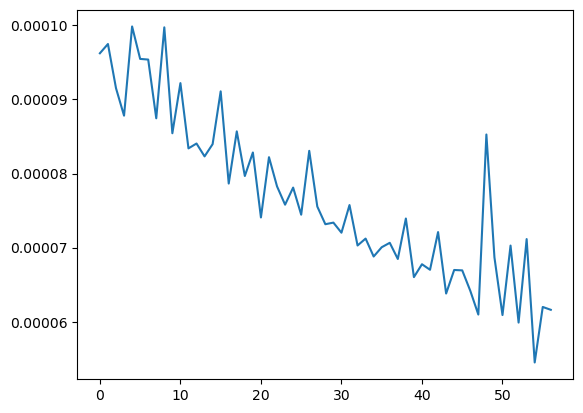

In [14]:
plt.plot(loss)